In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from keras.layers import Dense,LSTM,SimpleRNN,Dropout
from keras.models import Sequential


In [2]:
df = pd.read_csv('FINAL_USO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [4]:
gold_data = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

In [5]:
gold_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100


In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1718 non-null   object 
 1   Open       1718 non-null   float64
 2   High       1718 non-null   float64
 3   Low        1718 non-null   float64
 4   Close      1718 non-null   float64
 5   Adj Close  1718 non-null   float64
 6   Volume     1718 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 94.1+ KB


<AxesSubplot:>

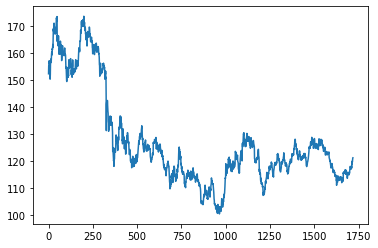

In [7]:
gold_data['Adj Close'].plot()

In [49]:
data = gold_data['Open'].values
data

array([154.740005, 154.309998, 155.479996, ..., 120.57    , 120.800003,
       120.980003])

In [50]:
data = data.reshape(-1,1)
data

array([[154.740005],
       [154.309998],
       [155.479996],
       ...,
       [120.57    ],
       [120.800003],
       [120.980003]])

In [51]:
train = data[:data.shape[0]-50]
test = data[len(train):]

In [52]:
train.shape

(1668, 1)

In [53]:
test.shape

(50, 1)

In [54]:
scaller = MinMaxScaler(feature_range=(0,1))
train_scalled = scaller.fit_transform(train)
train_scalled

array([[0.74460442],
       [0.73865524],
       [0.75484226],
       ...,
       [0.21029338],
       [0.21541229],
       [0.20711125]])

In [55]:
X_train , y_train = [] , []
timesteps = 50

for i in range (timesteps, train_scalled.shape[0]):
    X_train.append(train_scalled[i-timesteps:i,0])
    y_train.append(train_scalled[i,0])


In [56]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [57]:
X_train.shape

(1618, 50)

In [58]:
y_train.shape

(1618,)

In [59]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [60]:
model = Sequential()
model.add(LSTM(12, activation='tanh',input_shape=(X_train.shape[1],1),return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [61]:
model.fit(X_train,y_train,batch_size=4,epochs=150)

Epoch 1/150
405/405 [==============================] - 7s 11ms/step - loss: 0.0119
Epoch 2/150
405/405 [==============================] - 5s 12ms/step - loss: 0.0011
Epoch 3/150
405/405 [==============================] - 5s 12ms/step - loss: 0.0010
Epoch 4/150
405/405 [==============================] - 5s 12ms/step - loss: 8.7269e-04
Epoch 5/150
405/405 [==============================] - 5s 12ms/step - loss: 8.0828e-04
Epoch 6/150
405/405 [==============================] - 5s 12ms/step - loss: 7.2985e-04
Epoch 7/150
405/405 [==============================] - 4s 11ms/step - loss: 6.6744e-04
Epoch 8/150
405/405 [==============================] - 5s 11ms/step - loss: 6.1970e-04
Epoch 9/150
405/405 [==============================] - 5s 11ms/step - loss: 5.7742e-04
Epoch 10/150
405/405 [==============================] - 5s 11ms/step - loss: 5.3320e-04
Epoch 11/150
405/405 [==============================] - 4s 11ms/step - loss: 5.0832e-04
Epoch 12/150
405/405 [==============================]

405/405 [==============================] - 4s 11ms/step - loss: 3.1466e-04
Epoch 95/150
405/405 [==============================] - 4s 11ms/step - loss: 3.0366e-04
Epoch 96/150
405/405 [==============================] - 4s 11ms/step - loss: 3.0358e-04
Epoch 97/150
405/405 [==============================] - 4s 11ms/step - loss: 2.9206e-04
Epoch 98/150
405/405 [==============================] - 4s 11ms/step - loss: 3.0380e-04
Epoch 99/150
405/405 [==============================] - 4s 11ms/step - loss: 2.9693e-04
Epoch 100/150
405/405 [==============================] - 4s 11ms/step - loss: 3.0227e-04
Epoch 101/150
405/405 [==============================] - 4s 11ms/step - loss: 3.0389e-04
Epoch 102/150
405/405 [==============================] - 4s 11ms/step - loss: 3.0447e-04
Epoch 103/150
405/405 [==============================] - 4s 11ms/step - loss: 2.9726e-04
Epoch 104/150
405/405 [==============================] - 4s 11ms/step - loss: 2.9944e-04
Epoch 105/150
405/405 [=================

In [62]:
XT = data[len(data)-len(test)-timesteps:]
XT = XT.reshape(-1,1)
XT_scalled = scaller.transform(XT)



X_test = []
for i in range(timesteps,XT_scalled.shape[0]):
    X_test.append(XT_scalled[i-timesteps:i,0])


In [63]:
X_test = np.array(X_test)
X_test.shape

(50, 50)

In [64]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [65]:
predict = model.predict(X_test)
normal_price = scaller.inverse_transform(predict)

2/2 [==============================] - 0s 4ms/step


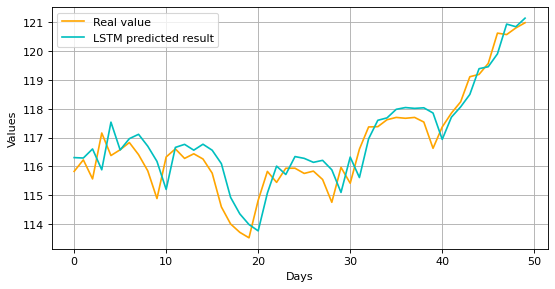

In [66]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(normal_price,color="c",label="LSTM predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [67]:
r2_score(test,normal_price)

0.8415079894407348

In [68]:
model2 = Sequential()
model2.add(LSTM(12, activation='tanh',input_shape=(X_train.shape[1],1),return_sequences=True))
model2.add(LSTM(6, activation='tanh',return_sequences=False))
model2.add(Dense(1))
model2.compile(optimizer='adam',loss='mean_squared_error')

In [69]:
model2.fit(X_train,y_train,batch_size=4,epochs=100)

Epoch 1/100
405/405 [==============================] - 12s 21ms/step - loss: 0.0060
Epoch 2/100
405/405 [==============================] - 9s 22ms/step - loss: 0.0015
Epoch 3/100
405/405 [==============================] - 9s 23ms/step - loss: 0.0012
Epoch 4/100
405/405 [==============================] - 9s 22ms/step - loss: 0.0010
Epoch 5/100
405/405 [==============================] - 9s 22ms/step - loss: 8.9459e-04
Epoch 6/100
405/405 [==============================] - 9s 22ms/step - loss: 7.7665e-04
Epoch 7/100
405/405 [==============================] - 9s 22ms/step - loss: 7.1929e-04
Epoch 8/100
405/405 [==============================] - 9s 22ms/step - loss: 6.6187e-04
Epoch 9/100
405/405 [==============================] - 10s 24ms/step - loss: 6.0746e-04
Epoch 10/100
405/405 [==============================] - 9s 23ms/step - loss: 5.8795e-04
Epoch 11/100
405/405 [==============================] - 9s 21ms/step - loss: 5.1219e-04
Epoch 12/100
405/405 [==============================] -

In [70]:
predict2 = model2.predict(X_test)
normal_price2 = scaller.inverse_transform(predict2)

2/2 [==============================] - 1s 6ms/step


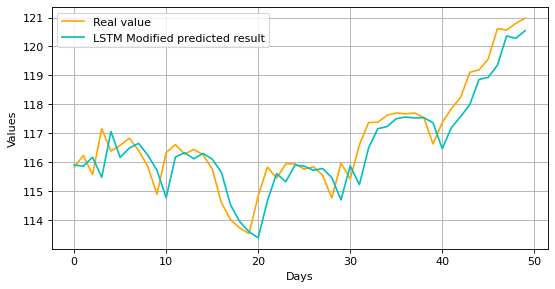

In [71]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(normal_price2,color="c",label="LSTM Modified predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [72]:
r2_score(test,normal_price2)

0.8360081891175716

In [73]:
model3 = Sequential()
model3.add(LSTM(12, activation='tanh',input_shape=(X_train.shape[1],1),return_sequences=True))
model3.add(LSTM(8, activation='tanh',return_sequences=False))
model3.add(Dense(1))
model3.compile(optimizer='adam',loss='mean_squared_error')

In [74]:
model3.fit(X_train,y_train,batch_size=32,epochs=150)

Epoch 1/150
51/51 [==============================] - 4s 22ms/step - loss: 0.0556
Epoch 2/150
51/51 [==============================] - 1s 23ms/step - loss: 0.0033
Epoch 3/150
51/51 [==============================] - 1s 22ms/step - loss: 0.0019
Epoch 4/150
51/51 [==============================] - 1s 22ms/step - loss: 0.0019
Epoch 5/150
51/51 [==============================] - 1s 22ms/step - loss: 0.0017
Epoch 6/150
51/51 [==============================] - 1s 22ms/step - loss: 0.0017
Epoch 7/150
51/51 [==============================] - 1s 22ms/step - loss: 0.0016
Epoch 8/150
51/51 [==============================] - 1s 22ms/step - loss: 0.0016
Epoch 9/150
51/51 [==============================] - 1s 23ms/step - loss: 0.0015
Epoch 10/150
51/51 [==============================] - 1s 22ms/step - loss: 0.0014
Epoch 11/150
51/51 [==============================] - 1s 23ms/step - loss: 0.0014
Epoch 12/150
51/51 [==============================] - 1s 22ms/step - loss: 0.0013
Epoch 13/150
51/51 [=====

51/51 [==============================] - 1s 22ms/step - loss: 3.1233e-04
Epoch 98/150
51/51 [==============================] - 1s 22ms/step - loss: 3.3057e-04
Epoch 99/150
51/51 [==============================] - 1s 22ms/step - loss: 3.1100e-04
Epoch 100/150
51/51 [==============================] - 1s 22ms/step - loss: 3.0387e-04
Epoch 101/150
51/51 [==============================] - 1s 22ms/step - loss: 3.0791e-04
Epoch 102/150
51/51 [==============================] - 1s 22ms/step - loss: 3.3821e-04
Epoch 103/150
51/51 [==============================] - 1s 22ms/step - loss: 3.0855e-04
Epoch 104/150
51/51 [==============================] - 1s 22ms/step - loss: 3.1289e-04
Epoch 105/150
51/51 [==============================] - 1s 22ms/step - loss: 3.0397e-04
Epoch 106/150
51/51 [==============================] - 1s 22ms/step - loss: 3.1438e-04
Epoch 107/150
51/51 [==============================] - 1s 22ms/step - loss: 3.2232e-04
Epoch 108/150
51/51 [==============================] - 1s 2

In [75]:
predict3 = model3.predict(X_test)
normal_price3 = scaller.inverse_transform(predict3)

2/2 [==============================] - 1s 5ms/step


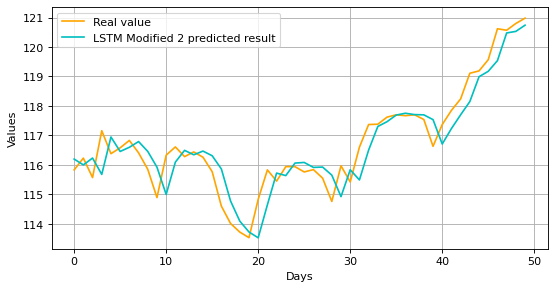

In [76]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(normal_price3,color="c",label="LSTM Modified 2 predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [77]:
r2_score(test,normal_price3)

0.8558694849423195

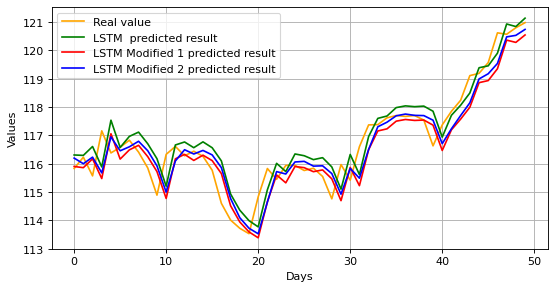

In [78]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(normal_price,color="green",label="LSTM  predicted result")
plt.plot(normal_price2,color="red",label="LSTM Modified 1 predicted result")
plt.plot(normal_price3,color="blue",label="LSTM Modified 2 predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()